# **Neuronske mreže - Klasifikacija cene mobilnih telefona**
**Studenti**: 
 - Natalija Stamenković, 1258
 - Milica Todorović, 1256

**Tema**: Predikcija klase cene mobilnih telefona na osnovu datih karakteristika. Korišćeni skup podataka može se naći na linku: https://www.kaggle.com/iabhishekofficial/mobile-price-classification.

### ***Deskriptivna analiza podataka***
#### *Importovanje paketa*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.set_option('display.max_columns', None)

#### *Učitavanje skupa podataka*
U tabeli se mogu videti vrednosti atributa datog skupa podataka. Svi atributi su numeričkog tipa. Klasifikaciju je potrebno izvršiti na osnovu poslednje kolone (*price_range*), pri čemu zavisna promenljiva uzima celobrojne vrednosti iz intervala [1,4] i označava klasu cene telefona.

In [2]:
data = pd.read_csv("dataset/train.csv")
data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2


#### *Provera nedefinisanih vrednosti*
Vrši se provera da li postoje atributi koji sadrže određene *missing* vrednosti (vrednosti koje fale). Pokazuje se da podaci ne sadrže nedefinisane vrednosti.

In [3]:
def check_missing_vals(data):
    # check for missing values
    missing_vals = data.isna().sum()
    print("Missing values: \n" + str(missing_vals))
    return missing_vals.sum() != 0

print("Missing values?:", check_missing_vals(data))

Missing values: 
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Missing values?: False


#### *Deskripcija atributa*
Sledeća tabela prikazuje statističke informacije o atributima (srednju vrednost, standardnu devijaciju, min, max itd.)

In [4]:
print("Describe data:")
data.describe(include='all')

Describe data:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Može se uočiti da atributi *px_height* (visina ekrana u pikselima) i *sc_w* (širina ekrana) za minimalnu vrednost imaju 0, što je nevalidan podatak, s obzirom da se radi o merama veličine telefona. Atributi *fc* (rezolucija prednje kamere) i *pc* (rezolucija zadnje kamere) takođe sadrže 0 kao vrednost, ali se ovaj podatak uzima kao oznaka nepostojanja datog tipa kamere na telefonu.

#### *Nevalidne vrednosti*
Potvrđivanje prethodnog zapažanja izvršeno je određivanjem broja 0 vrednosti u atributima *px_height* i *sc_w*.

In [10]:
def check_count_of_value(data, column, value):
    return data[column].isin([value]).sum()

print("No. of 0 values in px_height:", 
      check_count_of_value(data, 'px_height', 0))

No. of 0 values in px_height: 2


In [11]:
print("No. of 0 values in sc_w:", 
      check_count_of_value(data, 'sc_w', 0))

No. of 0 values in sc_w: 180


Date nevalidne vrednosti zamenjene su median vrednostima respektivnih atributa.

In [14]:
def replace_zero_vales_with_median(data):
    columns=["px_height", "sc_w"]
    for column in columns:
        median_value = data[column].median()
        data = data.replace({column: {0: median_value}})
    return data

data = replace_zero_vales_with_median(data)

#### *Countplot price_range atributa*
Na sledećem grafiku prikazan je histogram atributa *price_range*. Može se uočiti da su klase dobro balansirane.

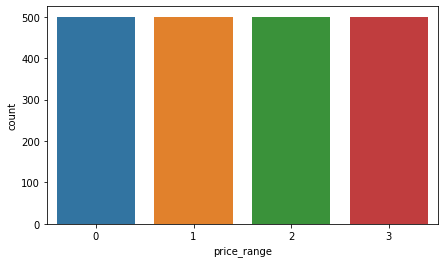

In [16]:
def plot_count(data, data_column):
    plt.figure(figsize=(7, 4))
    sns.countplot(x=data_column, data=data)
    
plot_count(data=data, data_column='price_range')

#### *Boxplot atributa*
Sledeći grafik prikazuje boxplot dijagram za svaki od atributa. Dijagram ne uključuje kategoričke atribute (*blue*, *dual_sim*, *four_g*, *three_g*, *touch_screen* i *wifi*), s obzirom da su vrednosti binarne, kao i atribut klase *price_range*. Može se uočiti minimalni broj outlier-a u *fc* i *px_height* atributima.

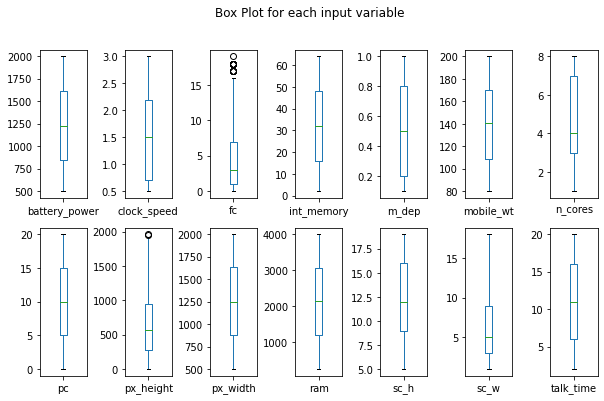

In [22]:
def plot_boxplot(data):
    data.plot(kind='box', figsize=(10, 6), subplots=True, layout=(2,7),
              sharex=False, sharey=False,
              title='Box Plot for each input variable')
    plt.subplots_adjust(wspace=0.8)

plot_boxplot(data.drop(['blue', 'dual_sim', 'four_g', 
                        'three_g', 'touch_screen', 'wifi', 'price_range'], axis=1))

#### *Raspodela vrednosti atributa po klasama*
Može se vizuelizovati raspodela vrednosti atributa po klasama. Može se uočiti očigledna rastuća zavisnost između *battery_power*, *ram* i klase cene telefona, kao i druge interesantne zavisnosti.

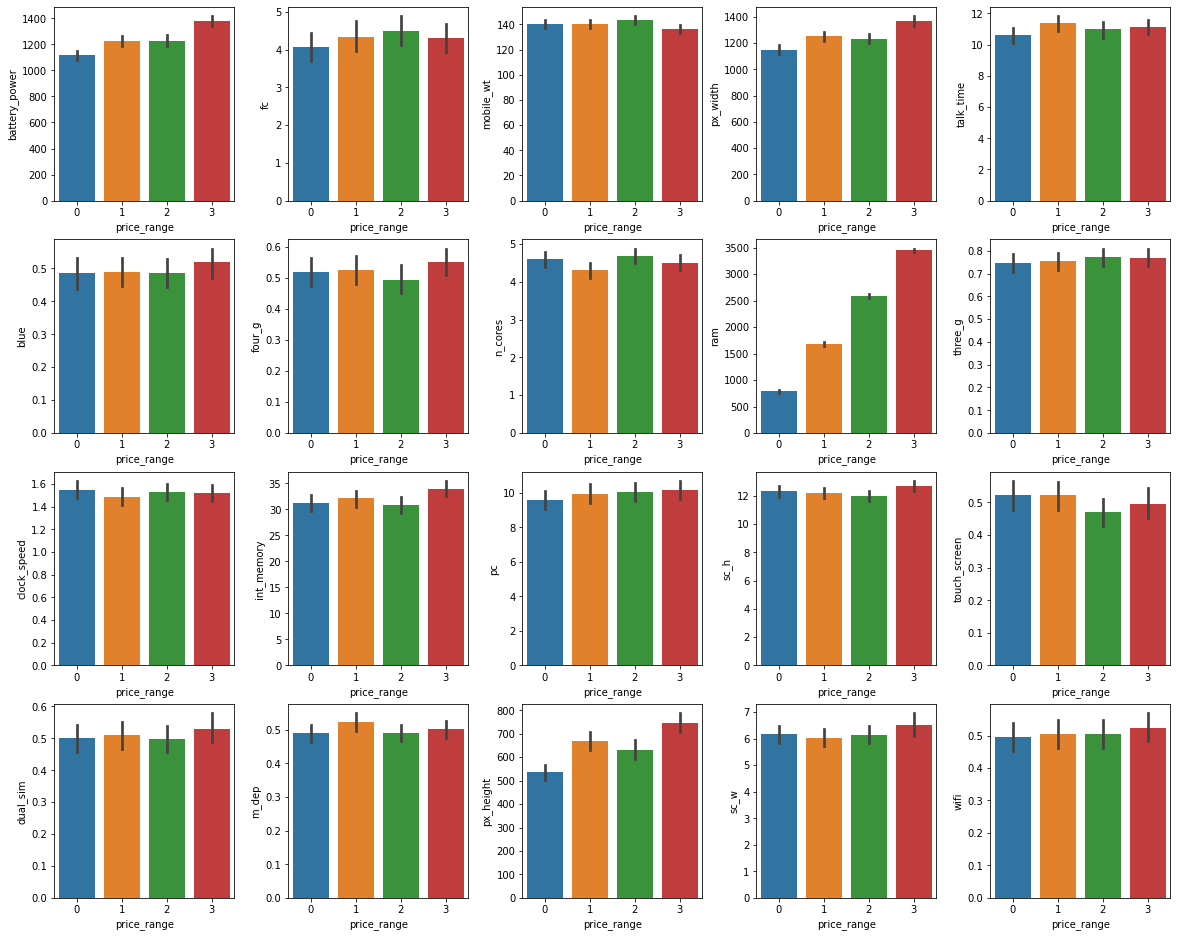

In [25]:
def plot_barplots(data):
    num_rows = 4
    num_cols = 5
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,15))
    plt.subplots_adjust(wspace=0.3, top=0.95)

    for i in range(0, num_rows):
        for j in range(0, num_cols):
            index = j * num_rows + i
            col_name = data.columns[index]
            sns.barplot(x='price_range', y=col_name, data=data, ax=axs[i][j])

plot_barplots(data)

#### *Matrica korelacije*
Dijagram prikazuje matricu korelacije fičera. Takođe, se štampaju fičeri sortirani po koeficijentu korelacije u opadajućem poredku, u odnosu na zavisnu klasifikacionu promenljivu.
Može se uočiti da atribut *ram* ima najveći stepen korelacije sa atributom *price_range*, što je već uočeno na prethodnom dijagramu. Atributi *battery_power* i rezolucija ekrana imaju takođe relativno visok uticaj na cenu uređaja. Pored toga, primećuje se da su neki parovi atributa visoko korelisani (*fc* i *pc*, *four_g* i *three_g* itd.) ali je to za očekivati, s obzirom na prirodu datih atributa.

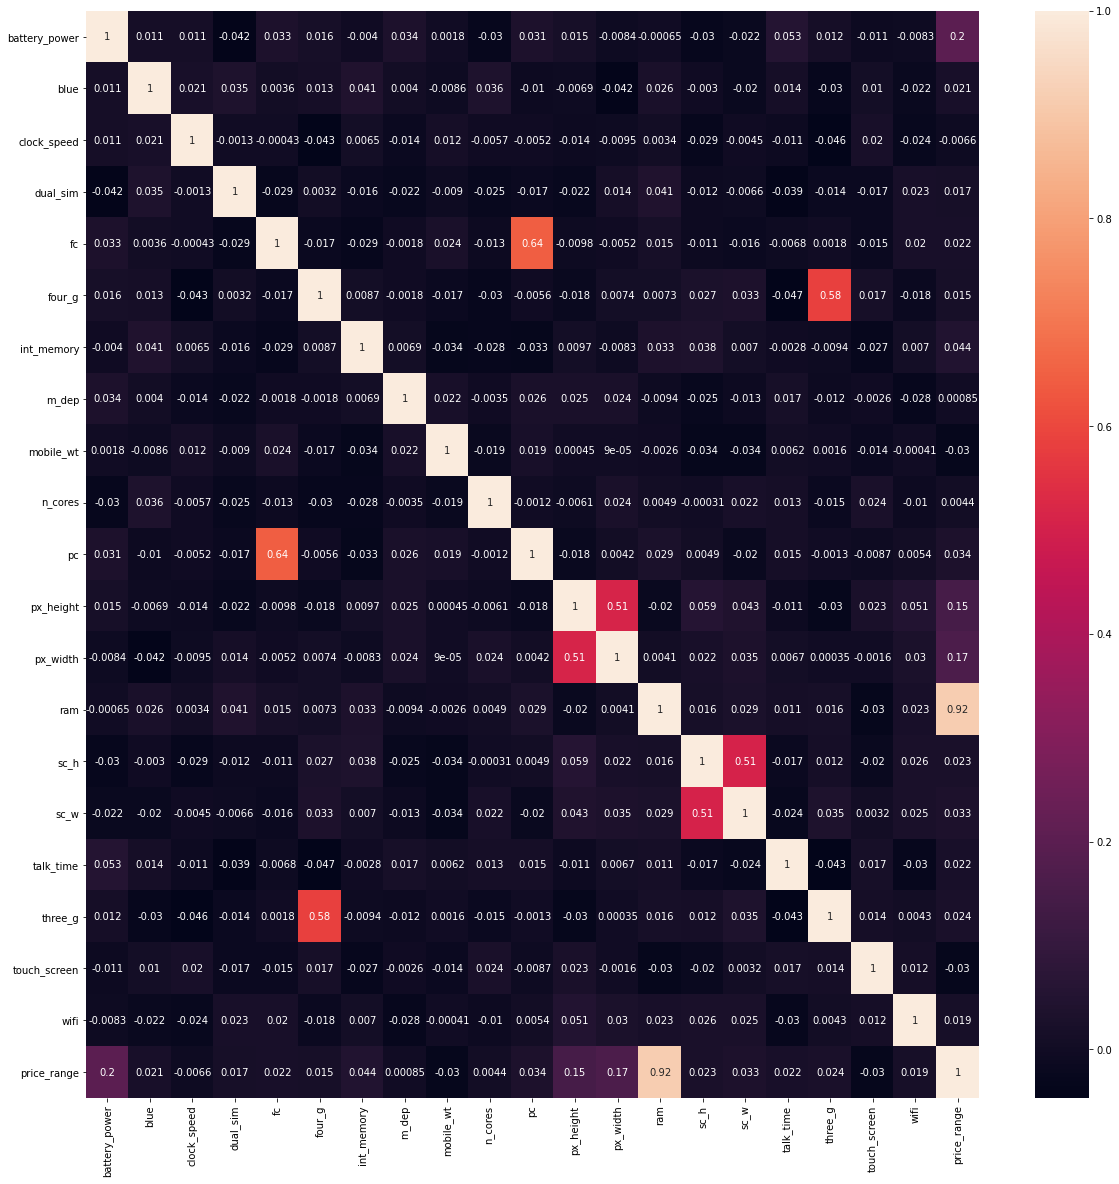

Sorted correlation values: 
 price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.149582
int_memory       0.044435
pc               0.033599
sc_w             0.032826
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64


In [28]:
def correlation_matrix(data):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax)
    plt.show()

    corr = abs(corr['price_range']).sort_values(ascending=False)
    return corr

corr = correlation_matrix(data)
print("Sorted correlation values: \n", corr)

### ***Preprocesiranje podataka***
Kategorički atributi su već enkodirani te nije potrebno dodatno preprocesiranje ovog tipa. Potrebno je podeliti dati skup podataka na nezavisne promenljive (atribute - x) i zavisnu promenljivu (*price_range* - y). 

In [29]:
def extract_data(data):
    x = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return x, y

x, y = extract_data(data)

Nakon toga, vrši se podela skupa podataka na trening i test skupove, pri čemu je za trening skup uzeto 20% celokupnog skupa.

In [30]:
def split_dataset(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_dataset(x, y)

Finalno, vrši se skaliranje vrednosti korišćenjem StandardScaler-a. Skaliranje se vrši zasebno na trening i test skupovima podataka, s obzirom da je potrebno tretirani test skup podataka kao podatke koji nisu prethodno "viđeni".

In [31]:
def scale_features(x_train, x_test):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    return x_train, x_test

x_train_s, x_test_s = scale_features(x_train, x_test)

In [32]:
df_train = pd.DataFrame(x_train_s)
df_train['price_range'] = y_train
df_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,price_range
0,1.548360,-0.981423,-1.236230,0.970437,0.620111,-1.046060,0.754832,-0.008935,1.425710,-1.547446,0.020269,0.274482,1.181997,-0.580476,-0.528061,0.715659,-1.445123,0.557137,0.99005,1.002503,1
1,-1.379535,1.018929,0.837112,-1.030464,-0.993561,0.955968,0.919763,-1.403674,-0.046246,1.510316,-1.476497,-0.260682,-0.556547,1.336453,-0.290196,-1.310537,0.915929,0.557137,0.99005,1.002503,2
